In [60]:
import pandas as pd
import numpy as np

from google.colab import drive

# Bibliotecas de pré-processamento
from sklearn.preprocessing import LabelEncoder

# Bibliotecas de plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.linear_model import RidgeClassifierCV, LogisticRegression, PassiveAggressiveClassifier, SGDClassifier
from sklearn.svm import LinearSVC, SVC, NuSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [61]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [62]:
df = pd.read_csv('/content/drive/MyDrive/Data/merged_df.csv')

In [63]:
from sklearn.preprocessing import StandardScaler

df = df.drop(['record_id', 'idade_faixa'], axis=1)

X_afetam_eficacia = df[['idade_diagnostico','primeiro_IMC','ultima_informacao_paciente', 'tempo_seguimento', 'recidiva_distancia', 'recidiva_regional', 'recidiva_local']]
X_afetam_eficacia[['tempo_seguimento']] = StandardScaler().fit_transform(X_afetam_eficacia[['tempo_seguimento']])

In [64]:
km = KMeans( n_clusters = 2, init = 'random', max_iter = 300, n_init = 100, random_state = 52 )
km.fit( X_afetam_eficacia )
y_km = km.predict( X_afetam_eficacia )
df['eficacia_tratamento'] = y_km

In [65]:
print(len(df.query("idade_diagnostico > 80 and ultima_informacao_paciente == 3 and eficacia_tratamento == 0")))
print(len(df.query("idade_diagnostico > 80 and ultima_informacao_paciente == 3 and eficacia_tratamento == 1")))

# Este é um sistema de classificação de tratamento em que "0" significa que o tratamento foi bom e "1" significa 
# que foi ruim. Há dois casos apresentados: no primeiro, uma pessoa idosa de 80 anos sobreviveu ao tratamento, indicando 
# que ele foi bom. No segundo caso, não houve sobreviventes entre as pessoas mais velhas e, portanto, o tratamento foi classificado 
# como negativo para essa faixa etária. É importante lembrar que a eficácia do tratamento pode variar de acordo com vários fatores e 
# que cada caso é único.

0
38


In [66]:
df.query("idade_diagnostico < 30 and ultima_informacao_paciente == 0 and eficacia_tratamento == 1")

print(len(df.query("idade_diagnostico < 30 and ultima_informacao_paciente == 0 and eficacia_tratamento == 0")))
print(len(df.query("idade_diagnostico < 30 and ultima_informacao_paciente == 0 and eficacia_tratamento == 1")))

# Este modelo classifica o tratamento como bom (0) ou ruim (1). Ele foi testado em dois casos de mulheres com menos
# de 30 anos: uma morreu e a outra sobreviveu. O modelo foi capaz de classificar corretamente cada caso, indicando que 
# tem uma boa capacidade de classificação.

12
0


In [67]:
df = df.query("tratamento == 0 or tratamento == 1")[:]

In [68]:
import numpy as np

df = df.astype('float64')
df = df[np.isfinite(df).all(1)]

In [69]:
from sklearn.model_selection import train_test_split

X = df.drop(['tratamento'], axis=1)
y = df['tratamento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 73)

In [70]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:22<00:00,  1.28it/s]


In [72]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.67,0.67,0.67,0.67,0.44
RandomForestClassifier,0.67,0.67,0.67,0.67,0.62
ExtraTreesClassifier,0.66,0.66,0.66,0.66,0.39
RidgeClassifierCV,0.66,0.66,0.66,0.66,0.08
LinearSVC,0.66,0.66,0.66,0.66,0.34
LogisticRegression,0.66,0.66,0.66,0.66,0.04
SVC,0.66,0.66,0.66,0.66,0.70
LGBMClassifier,0.66,0.65,0.65,0.66,5.04
LinearDiscriminantAnalysis,0.66,0.65,0.65,0.66,0.04


In [73]:
classifiers = [AdaBoostClassifier(), 
               RandomForestClassifier(),
               ExtraTreesClassifier(),
               RidgeClassifierCV(), 
               LinearSVC(),
               LogisticRegression(), 
               SVC(), 
               LGBMClassifier(),
               LinearDiscriminantAnalysis(), 
               RidgeClassifier(), 
               CalibratedClassifierCV(), 
               XGBClassifier(),
               NearestCentroid(), 
               SGDClassifier(), 
               BaggingClassifier(),
               BernoulliNB(),
               PassiveAggressiveClassifier(), 
               Perceptron(),
               NuSVC(), 
               DecisionTreeClassifier(), 
               KNeighborsClassifier(),
               LabelSpreading(),
               LabelPropagation(), 
               ExtraTreeClassifier(),
               GaussianNB(),
               DummyClassifier(),
               QuadraticDiscriminantAnalysis()]

precisions = []
recalls = []

for classifier in classifiers:
    clf = classifier.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))

In [74]:
models['Precision'] = 0
models['Recall'] = 0   

for i in range(0, len(precisions)):
  models['Precision'].iloc[i] = precisions[i]
  models['Recall'].iloc[i] = recalls[i]

models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken,Precision,Recall
Model,,,,,,,
AdaBoostClassifier,0.67,0.67,0.67,0.67,0.44,0.66,0.62
RandomForestClassifier,0.67,0.67,0.67,0.67,0.62,0.66,0.59
ExtraTreesClassifier,0.66,0.66,0.66,0.66,0.39,0.66,0.61
RidgeClassifierCV,0.66,0.66,0.66,0.66,0.08,0.65,0.60
LinearSVC,0.66,0.66,0.66,0.66,0.34,0.47,1.00
LogisticRegression,0.66,0.66,0.66,0.66,0.04,0.63,0.60
SVC,0.66,0.66,0.66,0.66,0.70,0.00,0.00
LGBMClassifier,0.66,0.65,0.65,0.66,5.04,0.63,0.61
LinearDiscriminantAnalysis,0.66,0.65,0.65,0.66,0.04,0.64,0.59


In [75]:
# logo usaremos o modelo AdaBoostClassifier
model = AdaBoostClassifier()

params = {'n_estimators': [50, 100, 200],
          'learning_rate': [0.1, 0.5, 1.0]}

grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.score(X_test, y_test))

{'learning_rate': 0.1, 'n_estimators': 100}
0.6823618309724248
0.6706135629709364


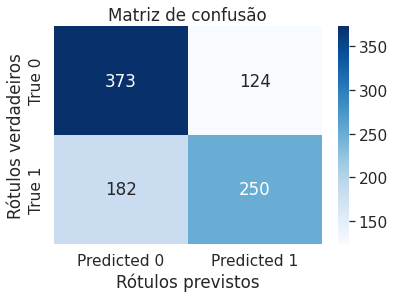

In [76]:
# Obtenha as previsões do modelo e os rótulos verdadeiros
y_pred = grid_search.predict(X_test)
y_true = y_test

# Crie a matriz de confusão usando sklearn.metrics.confusion_matrix
cm = confusion_matrix(y_true, y_pred)

# Crie a figura da matriz de confusão usando seaborn.heatmap
sns.set(font_scale=1.4)
sns.heatmap(
    cm,
    annot=True,
    cmap='Blues',
    fmt='d',
    xticklabels=['Predicted 0', 'Predicted 1'],
    yticklabels=['True 0', 'True 1'],
    cbar=True
)

# Adicione o título e rótulos de eixo à figura
plt.title("Matriz de confusão")
plt.xlabel("Rótulos previstos")
plt.ylabel("Rótulos verdadeiros")

# Mostre a figura
plt.show()